In [1]:
import theano
from theano import tensor as T

x1 = T.scalar()
w1 = T.scalar()
w0 = T.scalar()

z1 = w1*x1 + w0

net_input = theano.function(inputs=[w1, x1, w0], outputs=z1)

print net_input(1.0, 2.0, 0.5)

2.5


In [2]:
print theano.config.floatX

theano.config.floatX = 'float32'
# export THEANO_FLAGS=floatX=float32

print theano.config.floatX

print theano.config.device

float64
float32
cpu


In [14]:
from theano import tensor as T
import numpy as np

# initialize
x = T.fmatrix(name='x')
x_sum = T.sum(x, axis=0)

# compile
cal_sum = theano.function(inputs=[x], outputs=x_sum)

# execute
ary = [[1, 2, 3], [1, 2, 3]]
print cal_sum(ary)

ary = np.array([[1, 2, 3], [1, 2, 3]], dtype=theano.config.floatX)
print cal_sum(ary)

print x.type()

[ 2.  4.  6.]
[ 2.  4.  6.]
<TensorType(float32, matrix)>


In [28]:
from theano import tensor as T
import numpy as np

# initialize

data = np.array([[1, 2, 3]], dtype=theano.config.floatX)
x = T.fmatrix('x')
w = theano.shared(np.asarray([[0., 0., 0.]], dtype=theano.config.floatX))

z = x.dot(w.T)
update = [[w, w + 1.]]

# compile

net_input = theano.function(inputs=[],
                            updates = update,
                            givens = {x: data},
                            outputs = z)

# execute

for i in range(5):
    print w.get_value()
    print net_input()

[[ 0.  0.  0.]]
[[ 0.]]
[[ 1.  1.  1.]]
[[ 6.]]
[[ 2.  2.  2.]]
[[ 12.]]
[[ 3.  3.  3.]]
[[ 18.]]
[[ 4.  4.  4.]]
[[ 24.]]


In [60]:
import theano
from theano import tensor as T
import numpy as np

X_train = np.asarray([[0.0], [1.0], [2.0], [3.0], [4.0], [5.0], [6.0], [7.0], [8.0], [9.0]],
                     dtype=theano.config.floatX)
y_train = np.asarray([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0],
                     dtype=theano.config.floatX)

def train_linreg(X_train, y_train, eta, epochs):
    
    costs = []
    
    #Initialize arrays
    eta0 = T.fscalar('eta0')
    y = T.fvector(name = 'y')
    X = T.fmatrix(name = 'X')
    
    w = theano.shared(np.zeros(shape = (X_train.shape[1] + 1), 
                               dtype = theano.config.floatX), 
                               name = 'w')
    
    # calcaltate cost
    net_input = T.dot(X, w[1:]) + w[0]
    y_error = y - net_input
    cost = T.sum(T.pow(y_error, 2))
    
    # perform gradient update
    gradient = T.grad(cost, wrt = w)
    update = [[w, w - eta0 * gradient]]
    
    # compile model
    train = theano.function(inputs = [eta0], 
                          outputs = cost,
                          updates = update,
                          givens = {X: X_train, y: y_train})
    
    for i in range(epochs):
        costs.append(train(eta))
        
    return costs, w

def predict_linreg(X, w):
    Xt = T.fmatrix(name = 'X')
    net_input = T.dot(Xt, w[1:]) + w[0]
    
    predict = theano.function(inputs=[Xt],
                             givens = {w: w},
                             outputs = net_input)
    
    return predict(X)

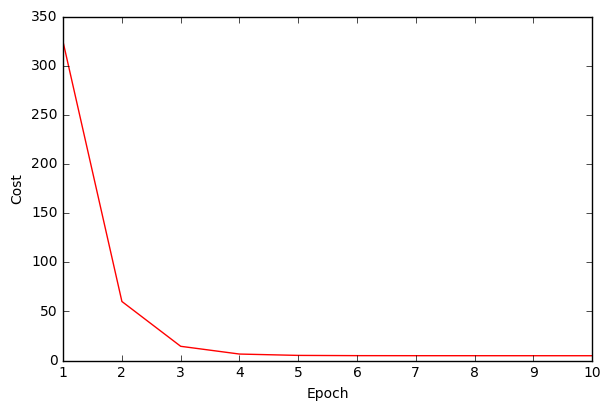

In [61]:
import matplotlib.pyplot as plt

costs, w = train_linreg(X_train, y_train, eta = 0.001, epochs = 10)

plt.plot(range(1, len(costs) + 1), costs, c = 'r')
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

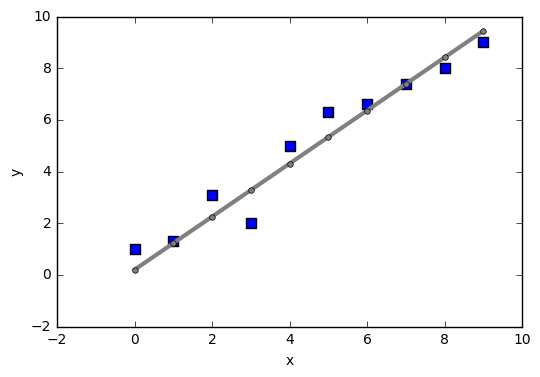

In [63]:
plt.scatter(X_train, y_train, marker = 's', s = 50)
plt.plot(range(X_train.shape[0]), predict_linreg(X_train, w),
        color = 'gray',
        marker = 'o',
        markersize = 4,
        linewidth = 3)

plt.xlabel('x')
plt.ylabel('y')
plt.show()